<a href="https://colab.research.google.com/github/rajivnalawade/LearnAI/blob/main/Scrapbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup kaggle for API access

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod -R 600 ~/.kaggle


Name: kaggle
Version: 1.6.17
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


Import dataset from kaggle using API

In [ ]:
! kaggle competitions download -c LANL-Earthquake-Prediction


 99% 2.26G/2.27G [00:21<00:00, 116MB/s] 
100% 2.27G/2.27G [00:21<00:00, 113MB/s]


Extract dataset

In [ ]:
from zipfile import ZipFile
datafile = '/content/LANL-Earthquake-Prediction.zip'

with ZipFile(datafile, 'r') as zip:
  zip.extractall()
  print('Dataset extracted')

Dataset extracted


Start with new dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load new dataset

In [ ]:
dataset = pd.read_csv('/content/datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [ ]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
dataset.shape

(215, 15)

In [ ]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


Imputation of missing values using median.

Start with analysis of data.

<ipython-input-24-1856de438606>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.salary)


<Axes: xlabel='salary', ylabel='Density'>

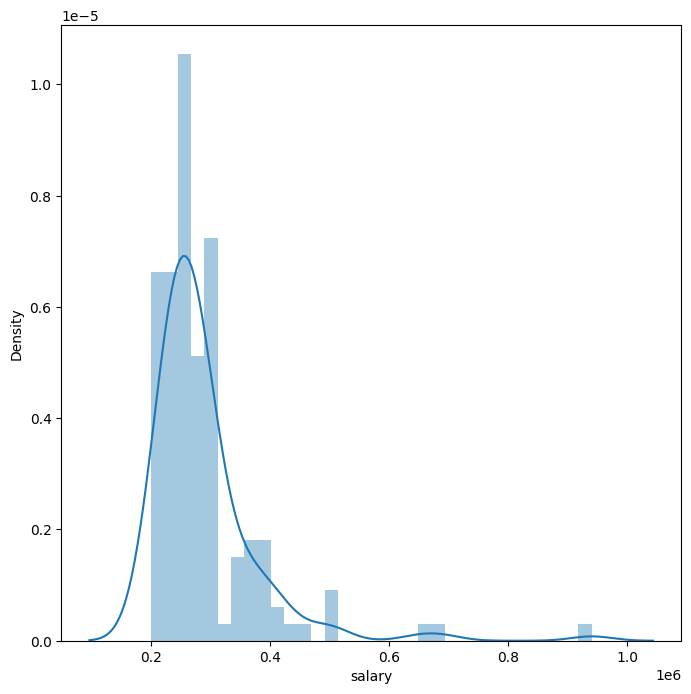

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(dataset.salary)
#sns.histplot(dataset.salary)

Let's try to use median for missing values

In [ ]:
print(dataset['salary'].mean())
print(dataset['salary'].median())
print(dataset['salary'].mode())
print(dataset['salary'].std())
print(type(dataset['salary']))
dataset['salary'].fillna(dataset['salary'].median(), inplace = True)
print(dataset['salary'].mean())
print(dataset['salary'].median())
print(dataset['salary'].mode())
print(dataset['salary'].std())

288655.4054054054
265000.0
0    300000.0
Name: salary, dtype: float64
93457.45241958875
<class 'pandas.core.series.Series'>
281283.72093023255
265000.0
0    265000.0
Name: salary, dtype: float64
78232.51030315325


<ipython-input-39-e8a584b3640c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(dataset['salary'].median(), inplace = True)


In [ ]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


Data Standardization!!

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [ ]:
print(df.head())
print(df.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
X = df
Y = dataset.target

In [ ]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Split data in test and training sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [ ]:
print(dataset.data.std())

228.29740508276657


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print(X_train_std)
print(X_train_std.std())

[[ 1.40381088  1.79283426  1.37960065 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -0.14461158  1.07121375 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278  -0.77271123 -0.09822185 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904  0.20084323  0.89267396 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238  2.3170559   1.67987211 ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981 -1.02636686 -0.74380549 ... -0.31826862 -0.40713129
  -0.38233653]]
1.0


In [ ]:
print(X_test_std)

[[-0.99455847 -0.05522817 -0.93005495 ... -0.5697545   0.02503231
  -0.50225186]
 [ 0.10656204  0.03898678  0.08315834 ... -0.32036185 -0.70933265
  -0.5692316 ]
 [-0.72278064 -0.03348626 -0.73041501 ... -0.75844367  0.17378428
  -0.12576093]
 ...
 [ 0.68654154  2.15036791  0.65326834 ...  0.36531844 -1.10548262
  -0.37639478]
 [-0.35293864 -1.46362085 -0.41837615 ... -0.95251542 -0.9629939
  -0.86523882]
 [-0.50703947 -1.02153533 -0.56445416 ... -1.03818808 -0.98021781
  -1.37352859]]
